<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
## Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
            
    - **Reference**
    
    [https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
df = pd.read_csv('../Data/breast-cancer-wisconsin-data-old.csv',
                 header = None,
                 names = [
            'Index',
            'Clump Thickness',
            'Uniformity of Cell Size',
            'Uniformity of Cell Shape',
            'Marginal Adhesion',
            'Single Epithelial Cell Size',
            'Bare Nuclei',
            'Bland Chromatin',
            'Normal Nucleoli',
            'Mitoses',
            'Class']
                )

In [30]:
df.head()

,Index,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
#Set "Index" column as an index:

df = df.set_index('Index')

In [32]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [33]:
df.info()

#No missing values, looks good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [34]:
#Examine the '1.3' feature, its labelled as an object

df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [35]:
#Null values are labelled as '?', although i initially thought there were no null values!

#Replacing the null values:

df = df.replace(to_replace = '?',
                value = np.nan)

In [60]:
#All the steps above could also be replaced with one line:

columns = [
            'Index',
            'Clump Thickness',
            'Uniformity of Cell Size',
            'Uniformity of Cell Shape',
            'Marginal Adhesion',
            'Single Epithelial Cell Size',
            'Bare Nuclei',
            'Bland Chromatin',
            'Normal Nucleoli',
            'Mitoses',
            'Class']

df = pd.read_csv('../Data/breast-cancer-wisconsin-data-old.csv',
                 header = None,
                 names = columns,
                 usecols = columns[1:], #Use all cols but first one
                 na_values = '?' #Replace '?' with nan
                )

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [84]:
#Impute nan values:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#This iterative imputer bases y on all other columns in dataframe iteratively

imputer = IterativeImputer()

df.loc[:,'Bare Nuclei'] = imputer.fit_transform(df[['Bare Nuclei']])



In [86]:
df.info()

#Has become float due to imputed values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  699 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [87]:
df.head()
#No need for scaling as data looks to be similarly scaled

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
#Split data:

X = df.drop('Class', axis = 1)
y = df['Class']

#Normalize (Scale) data:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
            
X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [90]:
#Done

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [91]:
#Time to try some classification models

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [92]:
#Done

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
#Try a Decision Tree

tree = DecisionTreeClassifier().fit(X_train,y_train)
tree_predictions = tree.predict(X_test)

In [95]:
#Try a K-Nearest neighbors classifier

KNN = KNeighborsClassifier().fit(X_train,y_train)
KNN_predictions = KNN.predict(X_test)


In [96]:
#Try some bagging!

tree_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                             n_estimators = 50,
                             max_samples = 1.0,
                             max_features = 1.0)


KNN_bag = BaggingClassifier(base_estimator = KNeighborsClassifier(),
                            n_estimators = 50,
                            max_samples = 1.0,
                            max_features = 1.0)

In [97]:
#Fit the bags and make some predictions:

tree_bag.fit(X_train,y_train)
tree_bag_predictions = tree_bag.predict(X_test)

In [98]:
KNN_bag.fit(X_train,y_train)
KNN_bag_predictions = KNN_bag.predict(X_test)

In [99]:
#Get some accuracy numbers:

from sklearn.metrics import accuracy_score

print('Accuracy for base Decision Tree Classifier:', accuracy_score(y_test,tree_predictions))
print('Accuracy for base KNN Classifier:', accuracy_score(y_test,KNN_predictions))
print('Accuracy for bagged Decision Tree Classifier:', accuracy_score(y_test,tree_bag_predictions))
print('Accuracy for bagged KNN Classifier:', accuracy_score(y_test,KNN_bag_predictions))

Accuracy for base Decision Tree Classifier: 0.9393939393939394
Accuracy for base KNN Classifier: 0.961038961038961
Accuracy for bagged Decision Tree Classifier: 0.9696969696969697
Accuracy for bagged KNN Classifier: 0.974025974025974


In [100]:
#The score has actually gone down, maybe we can optimize some parameters to make it go up?

In [101]:
%%time

from sklearn.model_selection import GridSearchCV

#Optimize bagged tree:
tree_bag_cv = GridSearchCV(estimator = tree_bag,
                           param_grid = {'base_estimator' : [DecisionTreeClassifier()],
                             'n_estimators' : np.arange(100,500,100),
                             'max_samples' : [0.5,0.8,1.0],
                             'max_features' : [0.8,1.0]},
                           cv = 3 #5 may take abit too long
                          )

tree_bag_cv.fit(X_train,y_train)


Wall time: 27.3 s


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=50),
             param_grid={'base_estimator': [DecisionTreeClassifier()],
                         'max_features': [0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': array([100, 200, 300, 400])})

In [102]:
#Check for the optimized parameters:

print('Best parameters for bagged Decision Tree:', '\n', tree_bag_cv.best_params_)


Best parameters for bagged Decision Tree: 
 {'base_estimator': DecisionTreeClassifier(), 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}


In [103]:
%%time

#Lets optimize for the bagged KNN classifier as well:

KNN_bag_cv = GridSearchCV(estimator = KNN_bag,
                          param_grid =  {'base_estimator' : [KNeighborsClassifier()],
                                         'n_estimators' : np.arange(100,500,100),
                                         'max_samples' : [0.5,0.8,1.0],
                                         'max_features' : [0.8,1.0]},
                         )
    
KNN_bag_cv.fit(X_train,y_train)

Wall time: 1min 3s


GridSearchCV(estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                         n_estimators=50),
             param_grid={'base_estimator': [KNeighborsClassifier()],
                         'max_features': [0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': array([100, 200, 300, 400])})

In [104]:
#Print the best parameters:

print('Best parameters for Bagged KNN:', KNN_bag_cv.best_params_)

Best parameters for Bagged KNN: {'base_estimator': KNeighborsClassifier(), 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}


In [105]:
#Make some predictions using the bagged models:

tree_bag_cv_predictions = tree_bag_cv.predict(X_test)
KNN_bag_cv_predictions = KNN_bag_cv.predict(X_test)

In [106]:
#Comparing the accuracy of the models:

print('Accuracy for base Decision Tree Classifier:', accuracy_score(y_test,tree_predictions))
print('Accuracy for bagged Decision Tree Classifier:', accuracy_score(y_test,tree_bag_predictions))
print('Accuracy for bagged Decision Tree Classifier (Optimized with cv):', accuracy_score(y_test,tree_bag_cv_predictions))
print('\n')
print('Accuracy for base KNN Classifier:', accuracy_score(y_test,KNN_predictions))
print('Accuracy for bagged KNN Classifier:', accuracy_score(y_test,KNN_bag_predictions))
print('Accuracy for bagged KNN Classifier (Optimized with cv):', accuracy_score(y_test,KNN_bag_cv_predictions))


Accuracy for base Decision Tree Classifier: 0.9393939393939394
Accuracy for bagged Decision Tree Classifier: 0.9696969696969697
Accuracy for bagged Decision Tree Classifier (Optimized with cv): 0.974025974025974


Accuracy for base KNN Classifier: 0.961038961038961
Accuracy for bagged KNN Classifier: 0.974025974025974
Accuracy for bagged KNN Classifier (Optimized with cv): 0.974025974025974


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [107]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [108]:
print(classification_report(y_test, KNN_predictions))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97       154
           4       0.97      0.91      0.94        77

    accuracy                           0.96       231
   macro avg       0.96      0.95      0.96       231
weighted avg       0.96      0.96      0.96       231



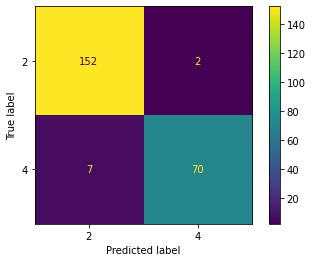

In [109]:
plot_confusion_matrix(estimator = KNN,
                      X = X_test, 
                      y_true = y_test)

#2 false positives and 3 false negatives (Assuming 4 is positive)

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

© 2020 Institute of Data